In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

df=pd.read_csv("/content/drive/MyDrive/MakineProje/StudentsPerformance.csv")
#Burada Tablonun sutünlarını türkçe olarak değştirldi.
turkce_sutun_isimleri = ['Cinsiyet','Sınıf','Ebeveyn_Egitim','Ogle_Yemegi','Kurs_Durumu','Matematik_Puan','Okuma_Puanı','Yazma_Puanı']
df.columns = turkce_sutun_isimleri
df.head()
#df.info()

,Cinsiyet,Sınıf,Ebeveyn_Egitim,Ogle_Yemegi,Kurs_Durumu,Matematik_Puan,Okuma_Puanı,Yazma_Puanı
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
#Burada sayısal değer olan notları analizini yapıyor
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Matematik_Puan,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
Okuma_Puanı,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
Yazma_Puanı,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [6]:
#Burada nesnelerin analizini yaparak durumları belirtiyor
df.describe(include="object")

,Cinsiyet,Sınıf,Ebeveyn_Egitim,Ogle_Yemegi,Kurs_Durumu
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [7]:
#Burada verisetimzde boş alan olup olmadığına bakıyoruz
df.isnull().sum()

Cinsiyet          0
Sınıf             0
Ebeveyn_Egitim    0
Ogle_Yemegi       0
Kurs_Durumu       0
Matematik_Puan    0
Okuma_Puanı       0
Yazma_Puanı       0
dtype: int64

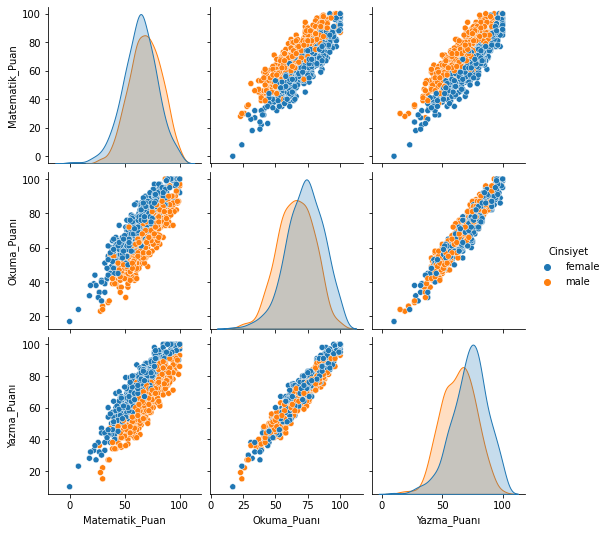

In [8]:
#Cinsiyet durumunu aldığı notları  grafikle gösterimi yapılıyor
sns.pairplot(df, hue="Cinsiyet")
plt.show()

In [9]:
#Bu fonksiyon ile satır sayısı ve sutün sayımızı veriyor ve sutün sayısı bizim sınıf sayımız oluyor
df.shape

(1000, 8)

In [10]:
#Burada sınıfların örnek sayıları ve etiketleri encoder ile sayısal değer veriyoruz.
df_categorical=["Cinsiyet", "Sınıf", "Ebeveyn_Egitim","Ogle_Yemegi", "Kurs_Durumu"]

In [11]:
#verilerimizi model içerisinde anlaşılır olması için Label Encoder ile nümerik değişkenlere dönüştüreceğiz.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df_categorical:
    df[i]=le.fit_transform(df[i])

In [12]:
df.head()

,Cinsiyet,Sınıf,Ebeveyn_Egitim,Ogle_Yemegi,Kurs_Durumu,Matematik_Puan,Okuma_Puanı,Yazma_Puanı
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [13]:
#Burada modele sokacağımız x ve y değişkenin
x=df.drop("Cinsiyet",axis=1)
y=df["Cinsiyet"]

In [14]:
#Verileri eğitim ve test olarak ayırıyoruz.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [15]:
#StandardScaler verilerimizi ölçeklendiriyoruz
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)  # x_train'i eğitip dönüştüryoruz
X_test = sc.transform(x_test)    # x_test'i  dönüştüryoruz

In [16]:
# LogisticRegression ile eğitim verilerimizi modelimizde eğitiyoruz
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [17]:
# Modelimizden çıkan sonuçların tahminini çıkarıyoruz.
y_pred = log_reg.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0])

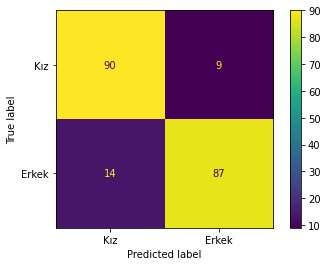

In [18]:
#Burada hata matriksi oluşturuyoruz.
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=["Kız","Erkek"])
disp.plot()

In [19]:
#Burada scorlarımızı yazdırıyoruz.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        99
           1       0.91      0.86      0.88       101

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



In [20]:
# Burada Değerlendirme yöntemi k-fold cross validation (k=10) ile gerçekleştiriyoruz.
from sklearn.model_selection import cross_val_score
a = cross_val_score(log_reg,X=X_train,y=y_train,cv=10)
print(a.mean())

0.8975000000000002


In [21]:
#Burada özniteliklerimizi çıkartıyoruz.
features = pd.DataFrame({'Öznitelikler' : x_train.columns})
features

,Öznitelikler
0,Sınıf
1,Ebeveyn_Egitim
2,Ogle_Yemegi
3,Kurs_Durumu
4,Matematik_Puan
5,Okuma_Puanı
6,Yazma_Puanı
